# Heart Disease UCI

Esse banco de dados contém 76 atributos, mas todas as experiências publicadas se referem ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único usado pelos pesquisadores de ML para
esta data. O campo "target" refere-se à presença de doença cardíaca no paciente. É um número inteiro avaliado de 0 (sem presença) a 1 (com presença).

https://www.kaggle.com/ronitf/heart-disease-uci/ (banco de dados utilizado) 

https://archive.ics.uci.edu/ml/datasets/Heart+Disease (banco de dados original antes da adaptação colocada no Kaggle)

Descrição dos atributos:

 - age......: idade
 - sex......: sexo (1 = masculino; 0 = feminino) 
 - cp.......: tipo de dor no peito 
     4 valores: 
       -- 1: angina típica -- dor muito caracteristica de quem vai enfartar
       -- 2: angina atípica -- possui algumas caracteristicas mas nao todas
       -- 3: dor não anginal -- dor não no peito 
       -- 4: assintomática
 - trestbps.: pressão sanguínea em repouso -- pressao normal
 - chol.....: colesterol sérico em mg/dl (miligramas por decílitro)
 - fbs......: açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso) -- pessoa com >120mg tem diabete 
 - restecg..: resultados eletrocardiográficos em repouso
     3 valores:
       -- 0: normal
       -- 1: com anormalidade da onda ST-T (Inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV) -->mais grave
       -- 2: mostrando provavelmente ou precisamente hipertrofia ventricular esquerda pelo critério de Estes 
 - thalach..: frequência cardíaca máxima alcançada 
 - exang....: angina induzida por exercício
 - oldpeak..: depressão do ST induzida pelo exercício em relação ao repouso
 - slope....: a inclinação do pico do exercício do segmento ST 
     3 valores:
       -- 1: ascendente
       -- 2: plano
       -- 3: descendente
 - ca.......: número de vasos principais (0-4) coloridos por fluoroscopia --> cateterismo foi feito por fluoroscopia
 - thal.....: 1 = normal; 2 = defeito fixo; 3 = defeito reversível

 - target...: diagnóstico de doença cardíaca (status da doença angiográfica)
     2 valores:
       -- 0: apresenta doença cardíaca (< 50% de estreitamento do diâmetro)
       -- 1: não apresenta doença cardíaca (> 50% de estreitamento do diâmetro)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#Verificar quantidade de target 
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
#Verificar se há valores faltantes
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


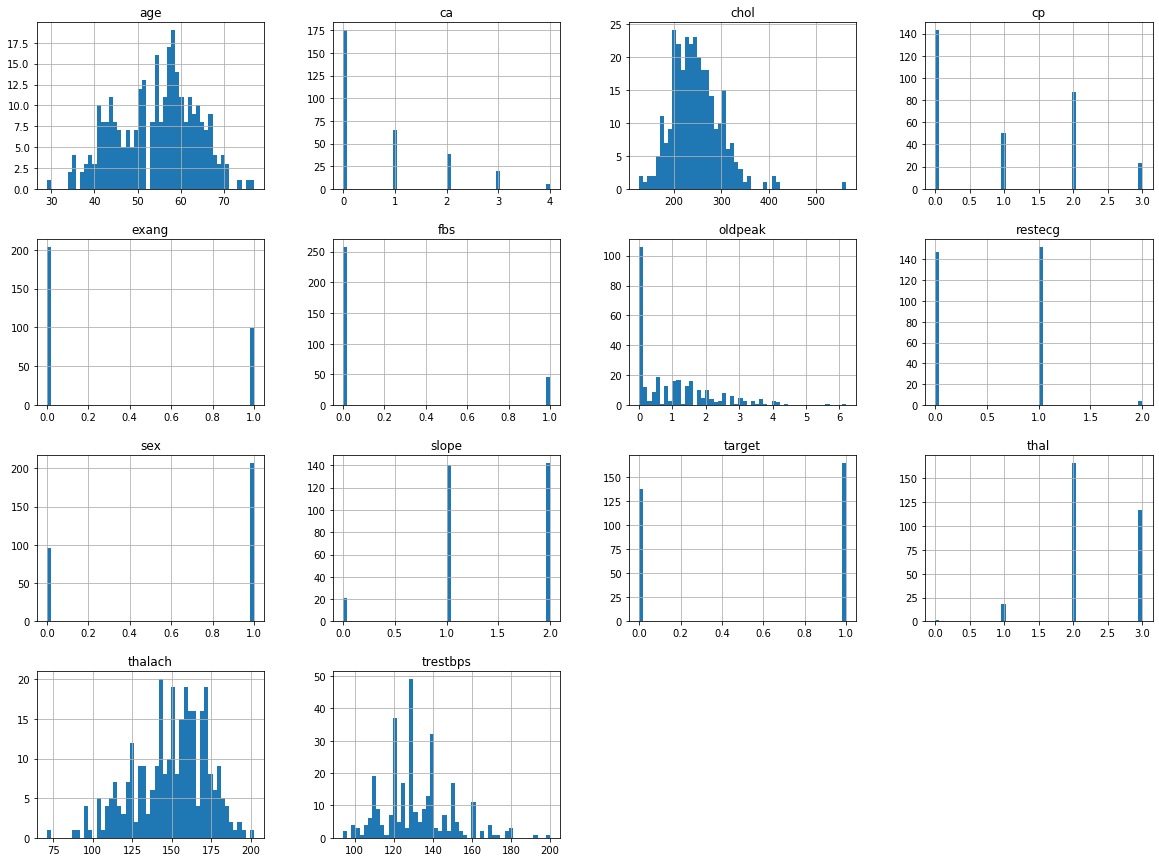

In [8]:
#Histograma 
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
print('Menor idade:', df['age'].min())
print('Maior idade:', df['age'].max())
print('Média de idade:', df['age'].mean())
print('Menor frequência cardíaca máxima alcançada:', df['thalach'].min())
print('Maior frequência cardíaca máxima alcançada:', df['thalach'].max())
print('Média frequência cardíaca máxima alcançada:', df['thalach'].mean())
print('Menor pressão sanguínea em repouso:', df['trestbps'].min())
print('Maior pressão sanguínea em repouso:', df['trestbps'].max())
print('Média pressão sanguínea em repouso:', df['trestbps'].mean())

Menor idade: 29
Maior idade: 77
Média de idade: 54.366336633663366
Menor frequência cardíaca máxima alcançada: 71
Maior frequência cardíaca máxima alcançada: 202
Média frequência cardíaca máxima alcançada: 149.64686468646866
Menor pressão sanguínea em repouso: 94
Maior pressão sanguínea em repouso: 200
Média pressão sanguínea em repouso: 131.62376237623764


In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

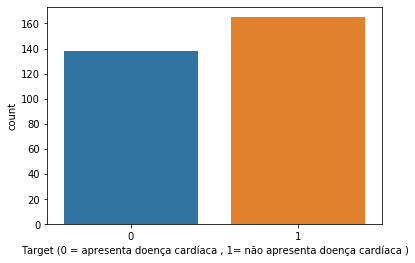

In [11]:
sns.countplot(x='target', data=df)
plt.xlabel("Target (0 = apresenta doença cardíaca , 1= não apresenta doença cardíaca )")
plt.show()


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

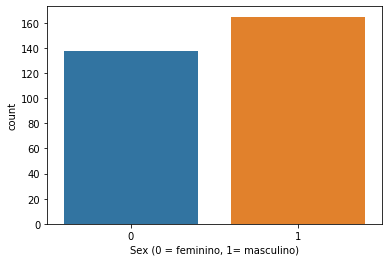

In [13]:
sns.countplot(x='target', data=df)
plt.xlabel("Sex (0 = feminino, 1= masculino)")
plt.show()


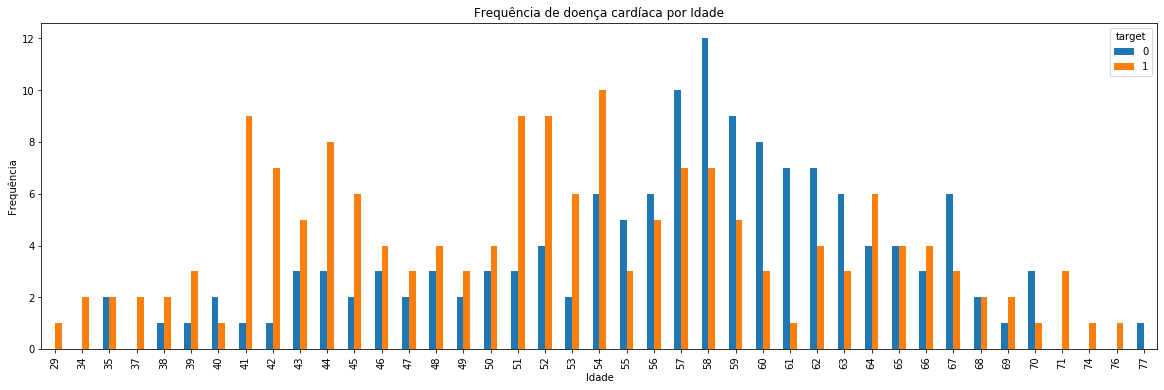

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Frequência de doença cardíaca por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

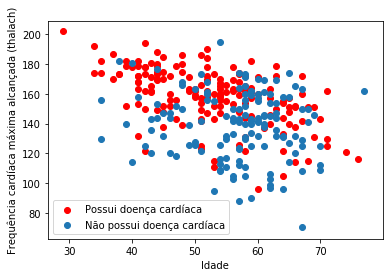

In [15]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Possui doença cardíaca", "Não possui doença cardíaca"])
plt.xlabel("Idade")
plt.ylabel("Frequência cardíaca máxima alcançada (thalach)")
plt.show()

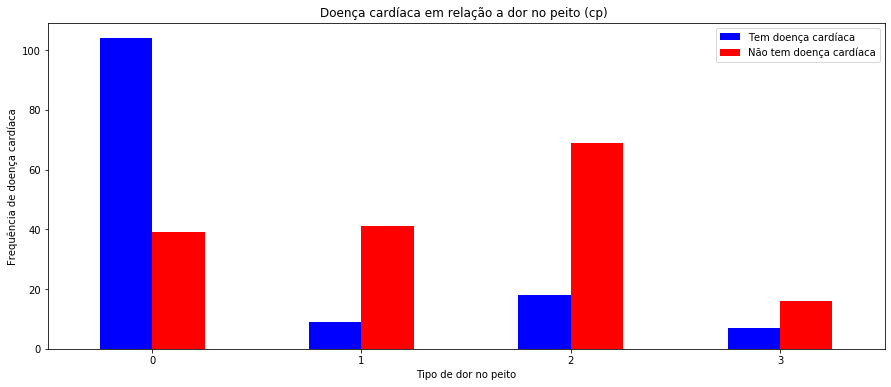

In [16]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Doença cardíaca em relação a dor no peito (cp) ')
plt.xlabel('Tipo de dor no peito')
plt.xticks(rotation = 0)
plt.ylabel('Frequência de doença cardíaca')
plt.legend(["Tem doença cardíaca", "Não tem doença cardíaca"])
plt.show()

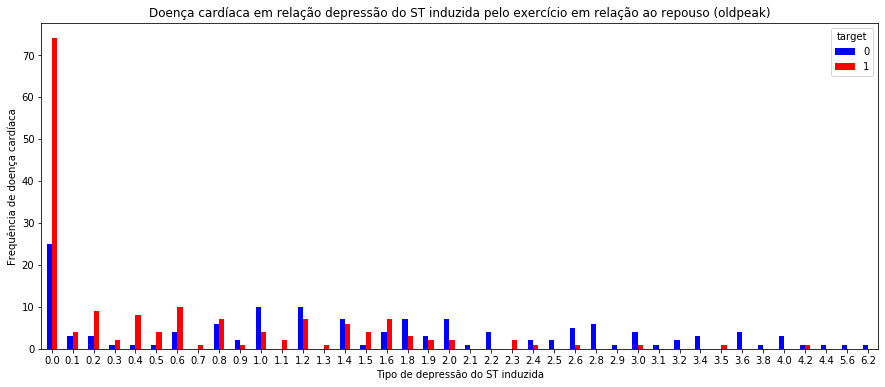

In [17]:
pd.crosstab(df.oldpeak,df.target).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Doença cardíaca em relação depressão do ST induzida pelo exercício em relação ao repouso (oldpeak)')
plt.xlabel('Tipo de depressão do ST induzida')
plt.xticks(rotation = 0)
plt.ylabel('Frequência de doença cardíaca')
plt.show()

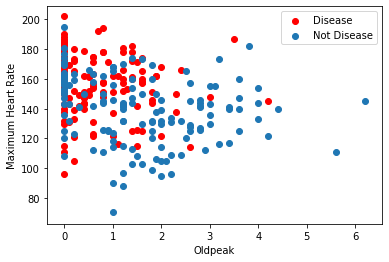

In [18]:
plt.scatter(x=df.oldpeak[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.oldpeak[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Oldpeak")
plt.ylabel("Maximum Heart Rate")
plt.show()

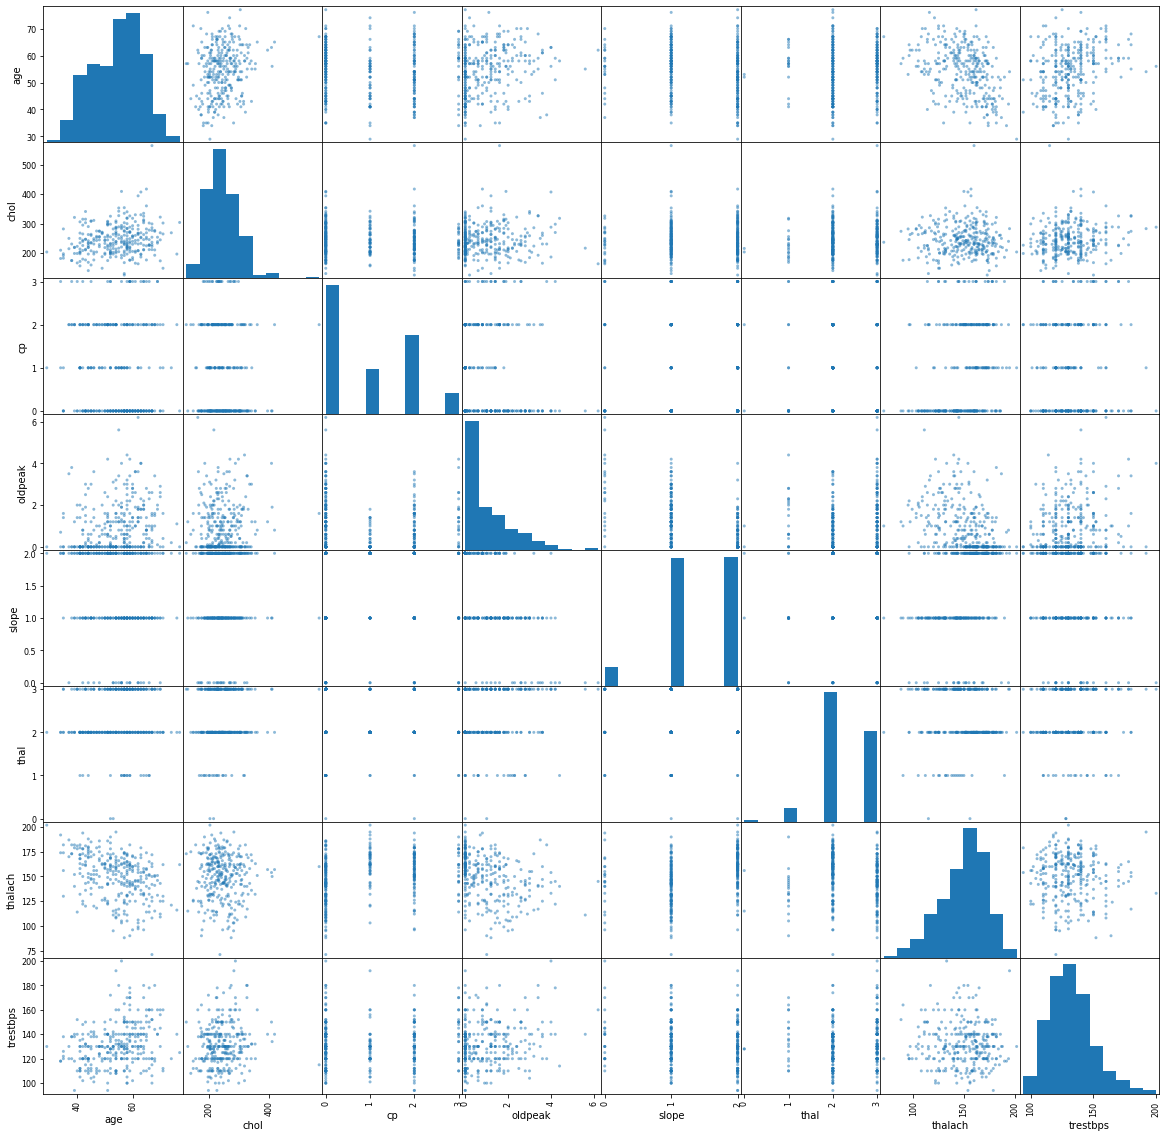

In [19]:
feature_names = ['age','chol','cp','oldpeak','slope','thal','thalach','trestbps']
pd.plotting.scatter_matrix(df[feature_names], figsize=(20,20))
plt.show()

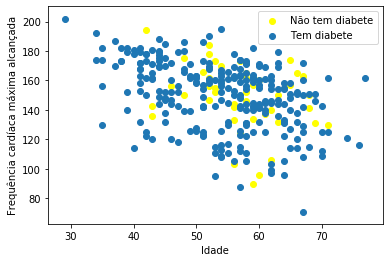

In [20]:
plt.scatter(x=df.age[df.fbs==1], y=df.thalach[(df.fbs==1)], c="yellow")
plt.scatter(x=df.age[df.fbs==0], y=df.thalach[(df.fbs==0)])
plt.legend(["Não tem diabete", "Tem diabete"])
plt.xlabel("Idade")
plt.ylabel("Frequência cardíaca máxima alcançada")
plt.show()

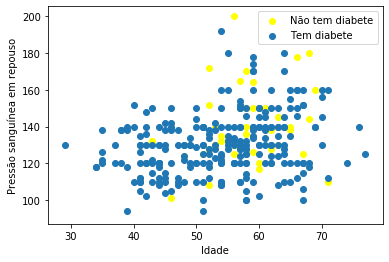

In [21]:
plt.scatter(x=df.age[df.fbs==1], y=df.trestbps [(df.fbs==1)], c="yellow")
plt.scatter(x=df.age[df.fbs==0], y=df.trestbps [(df.fbs==0)])
plt.legend(["Não tem diabete", "Tem diabete"])
plt.xlabel("Idade")
plt.ylabel("Pressão sanguínea em repouso")
plt.show()

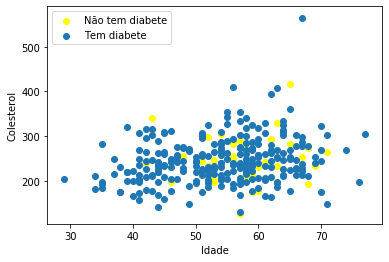

In [22]:
plt.scatter(x=df.age[df.fbs==1], y=df.chol [(df.fbs==1)], c="yellow")
plt.scatter(x=df.age[df.fbs==0], y=df.chol [(df.fbs==0)])
plt.legend(["Não tem diabete", "Tem diabete"])
plt.xlabel("Idade")
plt.ylabel("Colesterol")
plt.show()

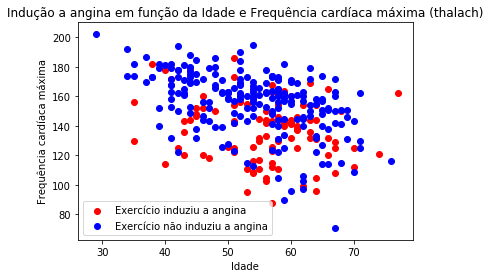

In [23]:
# Scatter de exemplos positivos
plt.scatter(df.age[df.exang==1],
            df.thalach[df.exang==1],
            c="red")

# Scatter de exemplos negativos
plt.scatter(df.age[df.exang==0],
            df.thalach[df.exang==0],
            c="blue")

plt.title("Indução a angina em função da Idade e Frequência cardíaca máxima (thalach)")
plt.xlabel("Idade")
plt.ylabel("Frequência cardíaca máxima")
plt.legend(["Exercício induziu a angina", "Exercício não induziu a angina"]);

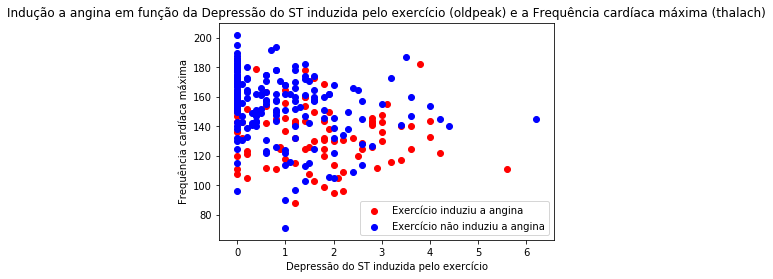

In [24]:
# Scatter de exemplos positivos
plt.scatter(df.oldpeak[df.exang==1],
            df.thalach[df.exang==1],
            c="red")

# Scatter de exemplos negativos
plt.scatter(df.oldpeak[df.exang==0],
            df.thalach[df.exang==0],
            c="blue")

plt.title("Indução a angina em função da Depressão do ST induzida pelo exercício (oldpeak) e a Frequência cardíaca máxima (thalach)")
plt.xlabel("Depressão do ST induzida pelo exercício")
plt.ylabel("Frequência cardíaca máxima")
plt.legend(["Exercício induziu a angina", "Exercício não induziu a angina"]);

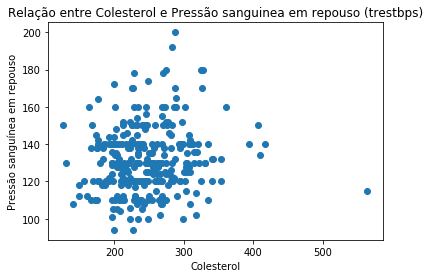

In [25]:
plt.scatter(df.chol, df.trestbps)
plt.title("Relação entre Colesterol e Pressão sanguinea em repouso (trestbps)")
plt.xlabel("Colesterol")
plt.ylabel("Pressão sanguínea em repouso")
plt.show()

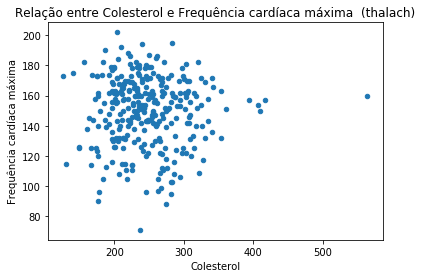

In [26]:
df.plot(x='chol',y='thalach', kind='scatter')
plt.title("Relação entre Colesterol e Frequência cardíaca máxima  (thalach)")
plt.xlabel("Colesterol")
plt.ylabel("Frequência cardíaca máxima")
plt.show()

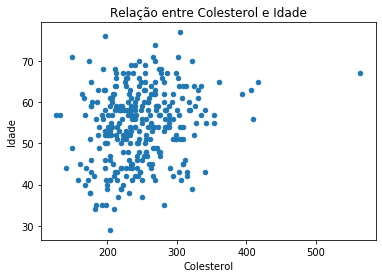

In [27]:
df.plot(x='chol',y='age', kind='scatter')
plt.title("Relação entre Colesterol e Idade")
plt.xlabel("Colesterol")
plt.ylabel("Idade")
plt.show()

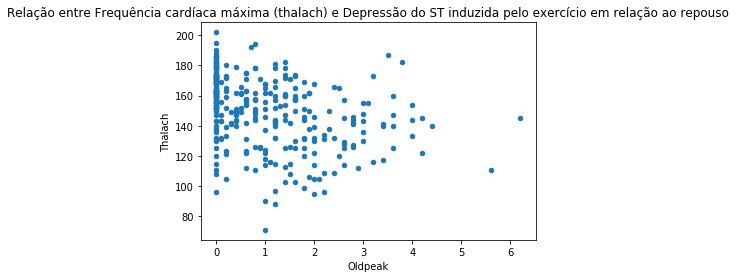

In [28]:
df.plot(x='oldpeak',y='thalach', kind='scatter')
plt.title("Relação entre Frequência cardíaca máxima (thalach) e Depressão do ST induzida pelo exercício em relação ao repouso")
plt.xlabel("Oldpeak")
plt.ylabel("Thalach")
plt.show()

# DADOS ANALISADOS

•	age (idade):
	-- Menor idade: 29
	-- Maior idade: 77
	-- Média de idade: 54

•	sex (sexo):
-- 0: feminino (count=96)
-- 1: masculino (count=207)

•	cp (Chest Pain): pacientes com cp 1,2 e 3 são mais prováveis de tem doença cardíaca do que pacientes com cp=0. Angina típica (1) e dor não anginal(3) são mais recorrentes. Tipos de dor no peito, 4 valores:
-- 0: angina típica -- dor muito caracteristica de quem vai enfartar
-- 1: angina atípica -- possui algumas caracteristicas mas nao todas
-- 2: dor não anginal -- dor não no peito 
-- 3: assintomática

•	trestbps (resting blood pressure/pressão sanguínea em repouso): é a pressão normal do paciente, por exemplo antes do teste ergométrico. Geralmente acima de 130-140 é considerado motivo para preocupação. 
	-- Menor pressão sanguínea em repouso: 94
	-- Maior pressão sanguínea em repouso: 200
	-- Média pressão sanguínea em repouso: 131


•	chol (serum cholestoral in mg/dl): acima de 200 é motivo para preocupação. Há um alto número de pessoas com chol entre 200 e 300. 
OBS: mg/dl (miligramas por decílitro)

•	fbs (açúcar no sangue em jejum): paciente com mais de 120mg tem diabete. 250 pessoas não atingiram os - 120mg (0 = falso); o restante tem mais que 120mg (1 = verdadeiro). Quem não atingiu, estava próximo ou distante de 120mg?
	-- 0: falso (não tem diabete)
	-- 1: verdadeiro (tem diabete)
    
•	restecg (resting electrocardiographic results/resultados eletrocardiográficos em repouso): pacientes com valor 1 (batimentos cardíacos não normais) apresentam maior probabilidade de ter doença cardíaca. Cerca de 300 pessoas apresentaram ou v 0 ou 1, quase ninguém apresentou resultado 2.
Resultados eletrocardiográficos em repouso 3 valores:
-- 0: normal
-- 1: com anormalidade da onda ST-T (Inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV) -->mais grave
-- 2: mostrando provavelmente ou precisamente hipertrofia ventricular esquerda pelo critério de Estes 

•	thalach (maximum heart rate achieved/frequência cardíaca máxima alcançada): pacientes que alcançaram 140 ou mais, são mais propensos a ter doença cardíaca.
	-- Menor frequência cardíaca máxima alcançada: 71
	-- Maior frequência cardíaca máxima alcançada: 202
	-- Média frequência cardíaca máxima alcançada: 149

•	exang (exercise induced angina/angina indizuda no exercicio): pacientes com valor 0 (No ==> exercice induced angina) tem mais doença cardíaca que pacientes com valor 1 (Yes ==> exercice induced angina). Ocorrência com valores em Zero é o dobro.

•	oldpeak (depressão do ST induzida pelo exercício em relação ao repouso): durante o exercício ergométrico (esteira) analisa o nível de estresse do coração, se o coração for menos saudável vai estressar mais. Pacientes em 0 tem maior probabilidade de ter doença cardíaca.

•	slope (the slope of the peak exercise ST segment/ inclinação do pico do exercício do segmento ST): é uma métrica também obtida durante o teste de ergométrico (esteira), o slope seria uma alteração no eletrogardiograma. Pacientes com slope igual a 2 (descendente), tem maior probabilidade de ter doença cardíaca que pacientes com slope igual a 0 (ascendente) ou 1 (plano). Cerca de 300 pessoas apresentaram valor 1 ou 2, poucas pessoas apresentaram 0. 
A inclinação do pico do exercício do segmento ST 3 valores:
-- 0: Upsloping (better heart rate with exercise)
-- 1: Flatsloping (minimal change - typical healthy heart)
-- 2: Downslopins (signs of unhealthy heart)

•	ca (number of major vessels): número de vasos principais (0-3) coloridos por fluoroscopia. Significa que o cateterismo foi feito por fluoroscopia, quanto maior movimento de sangue melhor, então pacientes com ca igual a 0 tem maior probabilidade de tem doença cardíaca

•	thal (thalium stress result): pacientes com valor 2 são mais prováveis de ter doença cardíaca. Esta métrica tem a ver com cateterismo (isso é avaliado antes através de cintilografia, se tiver defeito “consertado” ou reversível daí paciente deve fazer o cateterismo)
-- 1: normal
-- 2: defeito “consertado” (fixed defect: used to be  defect but ok now)
-- 3: defeito reversível

•	target...: diagnóstico de doença cardíaca (status da doença angiográfica) 2 valores:
-- 0: apresenta doença cardíaca (< 50% de estreitamento do diâmetro)
-- 1: não apresenta doença cardíaca (> 50% de estreitamento do diâmetro)


In [29]:
num_feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak',
                'slope','ca','thal','target',]

In [30]:
corr = np.corrcoef(df[num_feature_names],rowvar=False)
corr

array([[ 1.        , -0.0984466 , -0.06865302,  0.27935091,  0.21367796,
         0.12130765, -0.1162109 , -0.39852194,  0.09680083,  0.21001257,
        -0.16881424,  0.27632624,  0.06800138, -0.22543872],
       [-0.0984466 ,  1.        , -0.04935288, -0.05676882, -0.19791217,
         0.04503179, -0.05819627, -0.04401991,  0.14166381,  0.09609288,
        -0.03071057,  0.11826141,  0.2100411 , -0.28093658],
       [-0.06865302, -0.04935288,  1.        ,  0.04760776, -0.07690439,
         0.09444403,  0.04442059,  0.29576212, -0.39428027, -0.14923016,
         0.11971659, -0.18105303, -0.16173557,  0.43379826],
       [ 0.27935091, -0.05676882,  0.04760776,  1.        ,  0.12317421,
         0.17753054, -0.11410279, -0.04669773,  0.06761612,  0.19321647,
        -0.12147458,  0.10138899,  0.06220989, -0.14493113],
       [ 0.21367796, -0.19791217, -0.07690439,  0.12317421,  1.        ,
         0.0132936 , -0.15104008, -0.00993984,  0.06702278,  0.05395192,
        -0.00403777,  0.07

In [31]:
dfcorr = pd.DataFrame(corr,index=num_feature_names,columns=num_feature_names)
dfcorr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


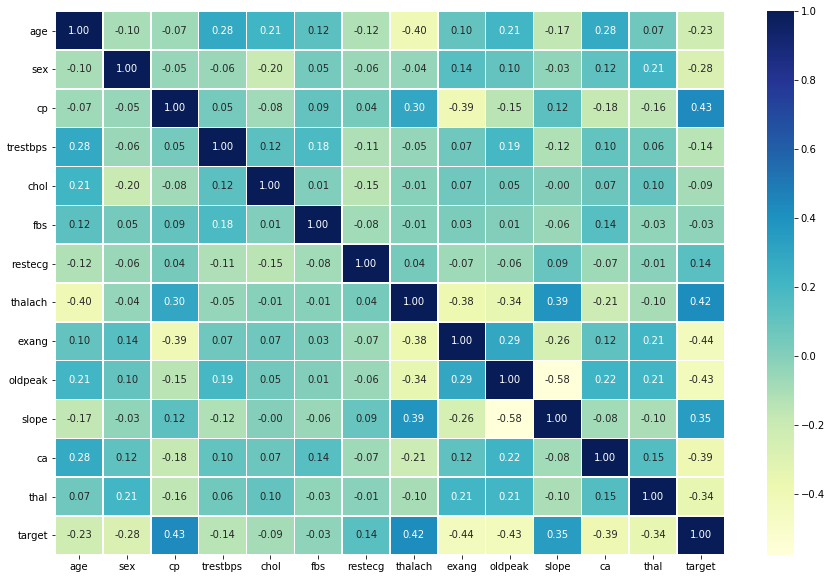

In [32]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(dfcorr,
                 annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

--> REALIZADO: dfcorr.to_csv('correlheart.csv',sep=';',decimal=',')

In [33]:
x1 = df.drop(["target"], axis=1)
x2 = df["target"]

x1 = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values
x = x1.join(x2)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0


# Pré-processamento

In [34]:
# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(x, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['target'].copy()
df_treino        = df_treino.drop(columns='target')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['target'].copy()
df_teste        = df_teste.drop(columns='target')

In [35]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [36]:
nomes_atributos_numericos   = ['trestbps', 'chol','thalach','oldpeak', 'age', 'ca']
nomes_atributos_categoricos = ['slope', 'thal', 'cp']
nomes_atributos_binarios    = ['sex','fbs','exang', 'restecg']

# Logistic Regression

In [37]:
pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo_lr = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('binarios',    'passthrough',          nomes_atributos_binarios),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

In [38]:
# pre-processamento do conjunto de treino
X_treino = preproc_completo_lr.fit_transform(df_treino)

# chamar fit_transform é o mesmo que chamar 
# primeiro fit para aprender os parâmetros
# e depois chamar transform para realizar 
# as transformações com base nos parâmetros
# previamente aprendidos, ou seja, chamar:

# pre-processamento do conjunto de teste
X_teste = preproc_completo_lr.transform(df_teste)

In [39]:
# Coluna alvo para os conjuntos de treino e teste
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

In [40]:
y_treino

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [41]:
print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(242, 21)
(242,)
(61, 21)
(61,)


In [42]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
np.round(y_probabilidade_reglog,decimals=2)

array([[0.95, 0.05],
       [0.55, 0.45],
       [0.18, 0.82],
       [0.98, 0.02],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.4 , 0.6 ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.25, 0.75],
       [0.52, 0.48],
       [0.91, 0.09],
       [0.08, 0.92],
       [0.95, 0.05],
       [0.02, 0.98],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.58, 0.42],
       [0.95, 0.05],
       [0.68, 0.32],
       [0.25, 0.75],
       [0.07, 0.93],
       [0.42, 0.58],
       [0.13, 0.87],
       [0.36, 0.64],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.85, 0.15],
       [0.19, 0.81],
       [0.93, 0.07],
       [0.24, 0.76],
       [0.1 , 0.9 ],
       [0.38, 0.62],
       [0.14, 0.86],
       [0.46, 0.54],
       [0.18, 0.82],
       [0.1 , 0.9 ],
       [0.25, 0.75],
       [0.2 , 0.8 ],
       [0.99, 0.01],
       [0.72, 0.28],
       [0.04,

In [44]:
y_previsto_reglog = log_reg.predict(X_teste)
y_previsto_reglog

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
acertos_reglog = y_previsto_reglog == y_teste
acertos_reglog

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [46]:
valores_reglog, quantidades_reglog = np.unique(acertos_reglog, return_counts=True)
print(np.asarray((valores_reglog, quantidades_reglog)))

[[ 0  1]
 [ 7 54]]


In [47]:
print("Acurácia: ", quantidades_reglog[1]/y_teste.shape[0])

Acurácia:  0.8852459016393442


# Decision Tree

In [48]:
preproc_completo_2 = ColumnTransformer([
    ('numericos',   'passthrough',    nomes_atributos_numericos),
    ('binarios',    'passthrough',          nomes_atributos_binarios),
    ('categoricos', OneHotEncoder(),  nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino_tree = preproc_completo_2.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste_tree = preproc_completo_2.transform(df_teste)

In [49]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_treino_tree, y_treino)
dt.classes_

array([0, 1], dtype=int64)

In [50]:
y_probabilidade_dt = dt.predict_proba(X_teste_tree)
np.round(y_probabilidade_dt,decimals=2)

array([[0.88, 0.12],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.88, 0.12],
       [0.51, 0.49],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.88, 0.12],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.88, 0.12],
       [0.5 , 0.5 ],
       [0.11, 0.89],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.88, 0.12],
       [0.88, 0.12],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.88, 0.12],
       [0.88, 0.12],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.88, 0.12],
       [0.11, 0.89],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.11, 0.89],
       [0.51, 0.49],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.5 , 0.5 ],
       [0.88, 0.12],
       [0.88, 0.12],
       [0.11,

In [51]:
y_previsto_dt = dt.predict(X_teste_tree)
y_previsto_dt

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
acertos_dt = y_previsto_dt == y_teste
acertos_dt

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True])

In [53]:
valores_dt, quantidades_dt = np.unique(acertos_dt, return_counts=True)
print(np.asarray((valores_dt, quantidades_dt)))

[[ 0  1]
 [17 44]]


In [54]:
print("Acurácia: ", accuracy_score(y_teste,y_previsto_dt))

Acurácia:  0.7213114754098361


# Random Forest

In [55]:
rf = RandomForestClassifier(max_depth=5,random_state=42)
rf.fit(X_treino_tree, y_treino)
rf.classes_

array([0, 1], dtype=int64)

In [56]:
y_probabilidade_rf = rf.predict_proba(X_teste_tree)
np.round(y_probabilidade_rf,decimals=2)

array([[0.88, 0.12],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.89, 0.11],
       [0.18, 0.82],
       [0.12, 0.88],
       [0.39, 0.61],
       [0.93, 0.07],
       [0.89, 0.11],
       [0.31, 0.69],
       [0.48, 0.52],
       [0.64, 0.36],
       [0.1 , 0.9 ],
       [0.91, 0.09],
       [0.08, 0.92],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.89, 0.11],
       [0.96, 0.04],
       [0.86, 0.14],
       [0.48, 0.52],
       [0.91, 0.09],
       [0.42, 0.58],
       [0.3 , 0.7 ],
       [0.28, 0.72],
       [0.42, 0.58],
       [0.21, 0.79],
       [0.24, 0.76],
       [0.88, 0.12],
       [0.18, 0.82],
       [0.86, 0.14],
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.64, 0.36],
       [0.36, 0.64],
       [0.9 , 0.1 ],
       [0.29, 0.71],
       [0.17, 0.83],
       [0.49, 0.51],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.13, 0.87],
       [0.15, 0.85],
       [0.26, 0.74],
       [0.35, 0.65],
       [0.76, 0.24],
       [0.64, 0.36],
       [0.04,

In [57]:
y_previsto_rf = rf.predict(X_teste_tree)
y_previsto_rf

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
acertos_rf = y_previsto_rf == y_teste
acertos_rf

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [59]:
valores_rf, quantidades_rf = np.unique(acertos_rf, return_counts=True)
print(np.asarray((valores_rf, quantidades_rf)))

[[ 0  1]
 [ 7 54]]


In [60]:
print("Acurácia: ", accuracy_score(y_teste,y_previsto_rf))

Acurácia:  0.8852459016393442


# Análise de desempenho

In [61]:
rl_test_score = accuracy_score(y_teste, log_reg.predict(X_teste)) * 100
rl_train_score = accuracy_score(y_treino, log_reg.predict(X_treino)) * 100
dt_test_score = accuracy_score(y_teste, dt.predict(X_teste_tree)) * 100
dt_train_score = accuracy_score(y_treino, dt.predict(X_treino_tree)) * 100
rf_test_score = accuracy_score(y_teste, rf.predict(X_teste_tree)) * 100
rf_train_score = accuracy_score(y_treino, rf.predict(X_treino_tree)) * 100

results_df = pd.DataFrame(data=[["Regressão Logísitca", rl_train_score, rl_test_score],
                                ["Decision Tree",dt_train_score,dt_test_score],
                                ["Random Forest",rf_train_score,rf_test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Regressão Logísitca,86.776860,88.524590
1,Decision Tree,76.033058,72.131148
2,Random Forest,93.801653,88.524590


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_treino, y_treino, X_teste, y_teste, train=True):
    if train:
        pred = clf.predict(X_treino)
        print("Resultado do treino:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_treino, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_treino, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_treino, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_treino, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_treino, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_teste)
        print("Resultado do teste:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_teste, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_teste, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_teste, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_teste, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_teste, pred)}\n")

In [63]:
print("========Logistic Regression========")
print("")
print_score(log_reg, X_treino, y_treino, X_teste, y_teste, train=True)
print_score(log_reg, X_treino, y_treino, X_teste, y_teste, train=False)

========Logistic Regression========

Resultado do treino:
Accuracy Score: 86.78%
_______________________________________________
Classification Report:	Precision Score: 85.31%
			Recall Score: 91.73%
			F1 score: 88.41%
_______________________________________________
Confusion Matrix: 
 [[ 88  21]
 [ 11 122]]

Resultado do teste:
Accuracy Score: 88.52%
_______________________________________________
Classification Report:	Precision Score: 93.10%
			Recall Score: 84.38%
			F1 score: 88.52%
_______________________________________________
Confusion Matrix: 
 [[27  2]
 [ 5 27]]



In [64]:
print("========Decision Tree========")
print("")
print_score(dt, X_treino_tree, y_treino, X_teste_tree, y_teste, train=True)
print_score(dt, X_treino_tree, y_treino, X_teste_tree, y_teste, train=False)

========Decision Tree========

Resultado do treino:
Accuracy Score: 76.03%
_______________________________________________
Classification Report:	Precision Score: 89.47%
			Recall Score: 63.91%
			F1 score: 74.56%
_______________________________________________
Confusion Matrix: 
 [[99 10]
 [48 85]]

Resultado do teste:
Accuracy Score: 72.13%
_______________________________________________
Classification Report:	Precision Score: 89.47%
			Recall Score: 53.12%
			F1 score: 66.67%
_______________________________________________
Confusion Matrix: 
 [[27  2]
 [15 17]]



In [65]:
print("========Random Forest========")
print("")
print_score(rf, X_treino_tree, y_treino, X_teste_tree, y_teste, train=True)
print_score(rf, X_treino_tree, y_treino, X_teste_tree, y_teste, train=False)

========Random Forest========

Resultado do treino:
Accuracy Score: 93.80%
_______________________________________________
Classification Report:	Precision Score: 92.14%
			Recall Score: 96.99%
			F1 score: 94.51%
_______________________________________________
Confusion Matrix: 
 [[ 98  11]
 [  4 129]]

Resultado do teste:
Accuracy Score: 88.52%
_______________________________________________
Classification Report:	Precision Score: 87.88%
			Recall Score: 90.62%
			F1 score: 89.23%
_______________________________________________
Confusion Matrix: 
 [[25  4]
 [ 3 29]]



In [66]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_teste, y_previsto_reglog)
cm_dt = confusion_matrix(y_teste, y_previsto_dt)
cm_rf = confusion_matrix(y_teste, y_previsto_rf)

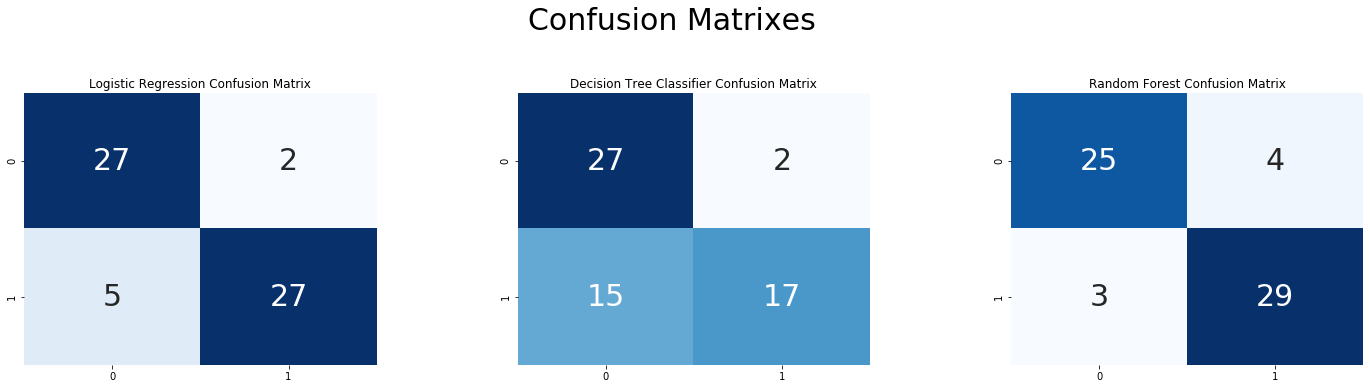

In [67]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=30)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

In [68]:
from sklearn.model_selection import cross_val_score

lr_cv_scores = cross_val_score(log_reg, X_treino, y_treino)
dt_cv_scores = cross_val_score(dt, X_treino_tree, y_treino)
rf_cv_scores = cross_val_score(rf, X_treino_tree, y_treino)

print("Logistic Regression")
print("Acurácia em cada particionamento: ", lr_cv_scores)
print("Acurácia média: ", lr_cv_scores.mean())
print("")
print("Decision Tree")
print("Acurácia em cada particionamento: ", dt_cv_scores)
print("Acurácia média: ", dt_cv_scores.mean())
print("")
print("Random Forest")
print("Acurácia em cada particionamento: ", rf_cv_scores)
print("Acurácia média: ", rf_cv_scores.mean())

Logistic Regression
Acurácia em cada particionamento:  [0.7755102  0.85714286 0.79166667 0.89583333 0.83333333]
Acurácia média:  0.8306972789115645

Decision Tree
Acurácia em cada particionamento:  [0.67346939 0.71428571 0.6875     0.79166667 0.75      ]
Acurácia média:  0.7233843537414966

Random Forest
Acurácia em cada particionamento:  [0.79591837 0.79591837 0.75       0.83333333 0.79166667]
Acurácia média:  0.7933673469387755


# Conclusão

Consideramos que o modelo de Regressão logística é mais adequado para o treinamento de máquina para os dados em questão (base de dados Heart Disease). Analisando os resultados de teste segunda a Confusion Matrix  e na acurácia da Cross Validation o modelo de Regressão logística apresentou quantidade menor de erros, isto é, quando o modelo previu doentes como não doentes. 
Os resultados do Precision Score, Recall Score e F1 Score da Floresta Aleotória e Regressão Logística foram muito próximos, porém como no nosso caso é mais importante um número menor de falsos positivos, entendemos que a Regressão logística apresentou valores melhores.